# Jupyter 快捷键
- 模式切换
    - esc 切换到命令模式
    - Enter 切换到编辑模式
- 编辑模式常用快捷键
    - Ctrl + ]缩进
    - Ctrl + Y 重做
    - Ctrl + Enter 运行当前单元
    - Shift + Enter 运行当前单，并选中下一个单元
    - Alt + Enter 运行当前单元，并新建下一个单元
- 命令模式常用快捷键
    - Y:原单元转为 code
    - M:原单元转为 Markdown
    - R:原单元转为 源码格式
    - A:在上方插入新单元
    - B:在下方插入新单元
    - Z:撤销操作
    - ii:终止代码运行
    - DD:删除单元
    - LL:中断内核
    - OO:重启内核

# 1. 什么是PyTorch?

[PyTorch](https://pytorch.org/)是一个基于Python的科学计算库，它有如下特点：
- 类似于Numpy,但是它可以使用GPU
- 可以用它定义深度学习模型，可以灵活的进行深度学习模型的训练和使用
- Tensors Tensor类似于Numpy的ndarray,唯一的区别是前者可以在GPU上加速运算

## 1.1 Tensors
- 导入torch

In [6]:
import torch

- 构造一个未初始化的矩阵：shape=5x3

In [7]:
x = torch.empty(5, 3)
print(x)

tensor([[1.0194e-38, 1.0469e-38, 1.0010e-38],
        [8.9081e-39, 8.9082e-39, 5.9694e-39],
        [8.9082e-39, 1.0194e-38, 9.1837e-39],
        [4.6837e-39, 9.2755e-39, 1.0837e-38],
        [8.4490e-39, 1.0653e-38, 9.1837e-39]])


- 构建一个随机初始化矩阵：shape=5x3

In [8]:
x = torch.rand(5, 3)
print(x)

tensor([[0.2182, 0.1750, 0.4464],
        [0.9918, 0.2686, 0.8402],
        [0.0303, 0.5727, 0.4813],
        [0.6570, 0.7687, 0.0126],
        [0.9432, 0.9665, 0.7907]])


- 构建一个全为0的，数据类型为long的矩阵：shape=5x3

In [9]:
x = torch.zeros(5, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


- 从数据中直接构建Tensor

In [10]:
y = [5, 3]
x = torch.tensor(y)
print(x)
print(id(x))
print(id(y))

tensor([5, 3])
1664230356056
1664230359112


- 也可以从一个已有的tensor构建一个tensor。这些方法会重用原来tensor的特征，如数据类型和数据等

In [11]:
x = x.new_ones(5, 3)   # new_*这个方法需要传递新tensor的sizes,也就是矩阵的形状
print(x)

y = torch.rand_like(x, dtype=torch.float)    # 穿甲一个与x形状相似的随机矩阵
print(y)

print(x.shape)
print(y.size())    # shape和size() 都是获取tensor的形状

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])
tensor([[0.3616, 0.6098, 0.2457],
        [0.1903, 0.3743, 0.9667],
        [0.4055, 0.9448, 0.3432],
        [0.1010, 0.4873, 0.9765],
        [0.0137, 0.6808, 0.8133]])
torch.Size([5, 3])
torch.Size([5, 3])


## 1.2 Tensor的运算    

- 加法

In [12]:
print(x)
print(y)
print(x+y)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])
tensor([[0.3616, 0.6098, 0.2457],
        [0.1903, 0.3743, 0.9667],
        [0.4055, 0.9448, 0.3432],
        [0.1010, 0.4873, 0.9765],
        [0.0137, 0.6808, 0.8133]])
tensor([[1.3616, 1.6098, 1.2457],
        [1.1903, 1.3743, 1.9667],
        [1.4055, 1.9448, 1.3432],
        [1.1010, 1.4873, 1.9765],
        [1.0137, 1.6808, 1.8133]])


- add加法

In [13]:
print(torch.add(x, y))

tensor([[1.3616, 1.6098, 1.2457],
        [1.1903, 1.3743, 1.9667],
        [1.4055, 1.9448, 1.3432],
        [1.1010, 1.4873, 1.9765],
        [1.0137, 1.6808, 1.8133]])


- 把加法的输出结果作为一个变量

In [14]:
result = torch.empty(5, 3)
print(result)
torch.add(x, y, out=result)
print(result)

tensor([[1.3616, 1.6098, 1.2457],
        [1.1903, 1.3743, 1.9667],
        [1.4055, 1.9448, 1.3432],
        [1.1010, 1.4873, 1.9765],
        [1.0137, 1.6808, 1.8133]])
tensor([[1.3616, 1.6098, 1.2457],
        [1.1903, 1.3743, 1.9667],
        [1.4055, 1.9448, 1.3432],
        [1.1010, 1.4873, 1.9765],
        [1.0137, 1.6808, 1.8133]])


- in-place加法 （in-place:原地取代的意思）

In [15]:
y = torch.zeros(x.size())
print(y)
y.add_(x)
print(y)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


- **注意：*
    - 所有in-place运算都会的名称都是一下划线"_"结尾，这种运算会直接改变被操作变量的值


## 1.3 Tensor的索引操作

In [16]:
print(x)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])


In [17]:
print(x[:,1])   # 取x的第1列，列标从0开始

tensor([1, 1, 1, 1, 1])


- Resizing:如果希望reshape tensor的形状可以使用：torch.view()

In [18]:
x = torch.ones(4, 4)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [19]:
y = x.view(2, 8)
print(y)

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])


- 通过设置一个维度为“-1”来进行自动推断tensor的形状

In [20]:
z = x.view(-1,2,2)
print(z)
print(z.size())

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])
torch.Size([4, 2, 2])


- 如果tensor中只包含一个元素，可以使用“.item()”方法，把tensor中的数值变成python的数值

In [21]:
x = torch.ones(1)
print(x)
print(x.item())
print(type(x))
print(type(x.item()))

tensor([1.])
1.0
<class 'torch.Tensor'>
<class 'float'>


## 1.4 Numpy和Tensor之间的转换

- Torch Tensor可以和Numpy array无障碍的转换
- Tensor 和 Numpy array之间会共享同一块数据内存，所以改变其中之一，两者的数据都会发生变化
- 所有CPU上的Tensor都支持转成numpy或者从numpy转成Tensor

- Tensor 转Numpy Array :   “.numpy()方法”

In [22]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [23]:
b = a.numpy()
print(b)
print(type(b))

[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


- 通过修改tensor的值来修改numpy中的值

In [24]:
print(id(a))
print(id(b))
# 修改tensor的值
a.add_(1)
print(a)
print(b)
print(id(a))
print(id(b))

1664230431144
1664230378640
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]
1664230431144
1664230378640


- Numpy ndarray 转 tensor

In [25]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a)
print(b)
np.add(a, 1, out=a)
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## 1.5 CUDA Tensors

".to()"方法，将tensor转移到GPU上运行,也可以把GPU上的数据转移到CPU上运行

In [26]:
if torch.cuda.is_available():
    gpu = torch.device('cuda')            # 获取GPU
    x = torch.ones(4)                     # 创建一个CPU的tensor
    y = torch.ones_like(x, device=gpu)    # 创建tensor的时候给它指定GPU
    x = x.to(gpu)                         # 把x转移到GPU上
    z = x + y
    print(z)
    print(z.to('cpu', torch.double))

tensor([2., 2., 2., 2.], device='cuda:0')
tensor([2., 2., 2., 2.], dtype=torch.float64)


## 1.6 Numpy ndarray操作

- 数据类型
- 创建数组
- 切片和索引操作
- 广播机制
- 矩阵计算

In [61]:
import numpy as np
a = np.arange(4)
print(a)
a = a.reshape(2, 2)
print(a)

b = np.arange(4).reshape(2, 2)
print(b)

[0 1 2 3]
[[0 1]
 [2 3]]
[[0 1]
 [2 3]]


- numpy.matmul() 函数返回两个数组的矩阵乘积,正常的矩阵运算

In [62]:
c = np.matmul(a, b)
c


array([[ 2,  3],
       [ 6, 11]])

- numpy.dot() 向量点成运算，也就是正常的矩阵运算

In [47]:
c = a.dot(b)
# c = np.dot(a, b)
print(c)

[[ 2  3]
 [ 6 11]]


- numpy矩阵直接相乘结果为矩阵的对应元素相乘


In [55]:
c = a * b
print(c)

[[0 1]
 [4 9]]


- numpy.vdot()向量的点积，即对应位置元素相乘在相加

In [56]:
c = np.vdot(a, b)
print(c)     

14


- np.T:矩阵转置

In [59]:
a = np.arange(12).reshape(3, 4)
print(a)
c = a.T
print(c)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


# 2. 全连接神经网络

## 理论知识

## 2.1 numpy实现两层全连接神经网络

- 一个全连接ReLU神经网络，一个隐藏层，没有bias。用来从x预测y,使用$L_{2}$Loss

- 这一实现完全使用numpy来计算前向神经网络，loss，和反向传播


- numpy ndarray 是一个普通的n为array。它不知道任何关于深度学习或者梯度的知识，也不知道计算图，只能是一种运来计算数学运算的数据结构。



0 1791.839952494872
1 623.7260539317557
2 252.86515768277013
3 152.14313660909153
4 99.28294181316527
5 69.12853478914477
6 52.063099906068324
7 42.81805854260313
8 37.99791695205263
9 35.45785088893951
10000 1.2359354042988429
20000 1.1489039135536838
30000 1.0804995036561755
40000 1.024365912402394
50000 0.9765606578531202
60000 0.9355610176206783
70000 0.9024503274952239
80000 0.8779138440310721
90000 0.8611207664507613
100000 0.8501834975289172


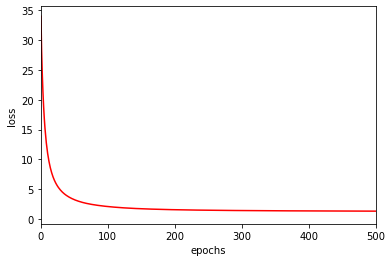

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N, D_in, H, D_out = 64, 784,100,10   # N是batch, D_in是输入维度，H为隐藏层维度，D_OUT为输出维度

# 创建输入输出数据
x = np.random.randn(N, D_in)    # x.shape:64x784 有64条数据，每条数据有784=28*28个特征
y = np.random.randn(N, D_out)   # y.shape:64x10 十分类为题,类似数字识别，64条数据

# 初始化权重参数
w1 = np.random.rand(D_in, H)    # w1.shape:784x100,输入维度是784，输出维度是100，隐藏层有10个节点
w2 = np.random.rand(H, D_out)   # w2.shape:100x10,隐藏层有100个节点，输出层为10个节点

# 学习率
lr = 1e-6
epochs = 100001
loss_list = []

# 学习过程，梯度下降迭代
for t in range(epochs):
    # 前向过程
    h = x.dot(w1)                        # 线性计算：h=xw
    h_relu = np.maximum(h, 0 )           # 激活函数：非线性变换 h_relu = relu(h)
    y_pred = h_relu.dot(w2)              # 线性计算预测值 y_pred = h_relu x w2
    
    # 计算损失函数
    loss = np.square(y_pred -y).sum()    # loss = (y_pred - y) ** 2
    RMSE = np.sqrt(loss/N)
    
    if t < 10:
        print(t, RMSE)        # 打印RMSE
    elif t % 10000 == 0:
        print(t, RMSE)        # 打印RMSE
    elif t % 10 == 0:
        loss_list.append(RMSE)
    
    # 反向传播计算梯度
    grad_y_pred = 2.0 * (y_pred - y)           # dl/dy_hat = 2(y_hat - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)        # dy_hat/w2 = h.T
    grad_h_relu = grad_y_pred.dot(w2.T)        
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h)                  #dh/dw1 = x.T
    
    # 梯度更新
    w1 -= lr * grad_w1
    w2 -= lr * grad_w2

    
# 打印训练过程
plt.plot(range(len(loss_list)), loss_list, color='r')
plt.xlim(0,500)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()



## PyTorch实现

### pytorch tensor实现
- 这里使用pytorch tensor来创建神经网路，前向传播，损失函数，反向传播

0 614.2645684068063
1 668.7027142161156
2 845.4242485285125
3 1067.3186590704765
4 1153.855554218118
5 911.8330548954672
6 468.15377815414456
7 216.2848815798275
8 161.5002012382647
9 146.57788032305558
100 11.10720135205084
200 3.2889929104870954
300 1.2764916763363008
400 0.5523863607370482
500 0.25484883633700234
600 0.12297976646856523
700 0.06149924150634968
800 0.03173702883083311
900 0.016943680927842195
1000 0.009507821379275787
4.5393900871276855


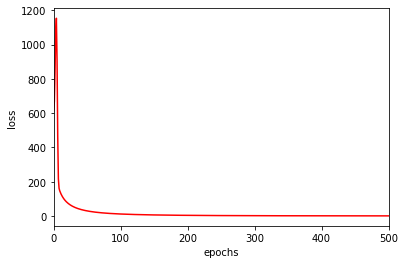

In [107]:
import torch

dtype = torch.float              # 设置数据类型
device = torch.device('cpu')     # 配置计算类型 cpu/gpu

# 转到GPU上运算
# if torch.cuda.is_available():
#     device = torch.device('cuda')

# 定义数据维度
N, D_in, H, D_out = 100, 784,100,10   # N是batch, D_in是输入维度，H为隐藏层维度，D_OUT为输出维度

# 构造数据集
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# 随机初始化权重参数
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

lr = 1e-6
epochs = 1001
loss_list = []

# 学习过程，梯度下降迭代
for t in range(epochs):
    # 前向计算
    h = x.mm(w1)    # z =xw
    h_relu = h.clamp(min=0)    # h = relu(z)
    y_pred = h_relu.mm(w2)     # 输出结果
    
    # 损失计算
    loss = (y_pred-y).pow(2).sum().item()    # .item()将loss转为python数据格式
    RMSE = np.sqrt(loss/N)
    loss_list.append(RMSE)
    
    if t < 10:
        print(t, RMSE)        # 打印RMSE
    elif t % 100 == 0:
        print(t, RMSE)        # 打印RMSE
    
    # 反向传播过程
    grad_y_pred = 2.0 * (y_pred - y)          # 计算损失函数对预测值的梯度
    grad_w2 = h_relu.t().mm(grad_y_pred)      # 计算w2的梯度
    grad_h_relu = grad_y_pred.mm(w2.t())      # 计算隐藏层输出的梯度
    grad_h = grad_h_relu.clone()
    grad_h[h<0] = 0
    grad_w1 = x.t().mm(grad_h)                # 计算w1的梯度
    
    # 更新梯度
    w1 -= lr * grad_w1
    w2 -= lr * grad_w2


print(t2-t1)

# 打印训练过程
plt.plot(range(len(loss_list)), loss_list, color='r')
plt.xlim(0, 500)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


### pytorch tensor and autograd

#### 利用backward方法求导数
- Pytorch通过backward()方法实现梯度的自动计算，梯度值保存到tensor变量的grad属性中
- backward 方法通常在一个标量张量上调用，该方法求得的梯度将存在对应自变量张量的grad属性下
- pytorch中对tensor变量的梯度会累积，所以每一次更新梯度后都需要将原来的梯度清零：tensor.grad.zero_()
- tensor的requires_grad的属性默认为False,若一个节点（叶子变量：自己创建的tensor）requires_grad被设置为True，那么所有依赖它的节点requires_grad自动为True（即使其他相依赖的tensor的requires_grad = False）


- 计算图 ：y=(a+b)(b+1)</br></br>
![image-20210628184807972](https://gitee.com/jhongtao/mdpic/raw/master/mdimg/20210628184817.png)

- 用pytorch实现y=(a+b)(b++1)的计算图

In [122]:
import torch

# y = (a+b)*(b+1)
a = torch.tensor(2., requires_grad=True)
b = torch.tensor(1., requires_grad=True)
y = (a+b)*(b+1)

y.backward()

dy_da = a.grad
dy_db = b.grad

print(dy_da)
print(dy_db)

a.grad.zero_()
b.grad.zero_()

tensor(2.)
tensor(5.)


tensor(0.)

### 用pytorch的自动求导机制实现backward

0 584.9428006224199
1 630.1979371594293
2 887.6427659819011
3 1320.3850953415067
4 1640.5591242012586
5 1209.7698293477151
6 305.9783652482639
7 156.004455064591
8 143.60614105949648
9 133.86648198858444
1000 0.01694319942080055
2000 0.0010834263735198446
3000 0.0005764468923770873
4000 0.0004218027651970676
5000 0.00034298847402099283
6000 0.0002946511190077998
7000 0.0002607082906243017
8000 0.00023752229066097242
9000 0.00021847504676242627
10000 0.0002041529943113512
5.565657615661621


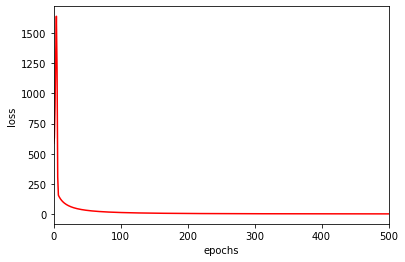

In [134]:
import torch
import time

dtype = torch.float              # 设置数据类型
device = torch.device('cpu')     # 配置计算类型 cpu/gpu

# 转到GPU上运算
# if torch.cuda.is_available():
#     device = torch.device('cuda')

# 定义数据维度
N, D_in, H, D_out = 100, 784,100,10   # N是batch, D_in是输入维度，H为隐藏层维度，D_OUT为输出维度

# 构造数据集
x = torch.randn(N, D_in, device=device, dtype=dtype, requires_grad=True)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# 随机初始化权重参数
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

lr = 1e-6
epochs = 10001
loss_list = []

t1 = time.time()

# 学习过程，梯度下降迭代
for t in range(epochs):
    # 一步到位直接计算出预测值
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    
    # 计算loss
    loss = (y_pred - y).pow(2).sum()
    RMSE = np.sqrt(loss.item()/N)
    loss_list.append(RMSE)
    
    if t < 10:
        print(t, RMSE)        # 打印RMSE
    elif t % 1000 == 0:
        print(t, RMSE)        # 打印RMSE
    
    # backward，计算梯度
    loss.backward()
    
    # 对w1,w2的梯度
    with torch.no_grad():
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad
        
        # 每次更新梯度后需要清空梯度，pytorch默认会自动累计梯度
        w1.grad.zero_()
        w2.grad.zero_()

t2 = time.time()
print(t2 - t1)
        
# 打印训练过程
plt.plot(range(len(loss_list)), loss_list, color='r')
plt.xlim(0, 500)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

### PyTorch:nn 使用pytorch的nn


0 3.2757662510090673
1 3.1596301902996693
2 3.057636643831821
3 2.9665719806548183
4 2.8836360823904363
5 2.806750416476432
6 2.7348514093905196
7 2.666172871965193
8 2.6002309843310076
9 2.5366028952216535
1000 3.720435764369778e-06
2000 1.038875833974284e-06
3000 6.582529980056586e-07
4000 4.915112394490752e-07
5000 4.087567883653499e-07
6000 3.3948317499910426e-07
7000 3.045486194525477e-07
8000 2.5941989897980846e-07
9000 2.4929294333509953e-07
10000 2.3293207983904546e-07
11.668392658233643


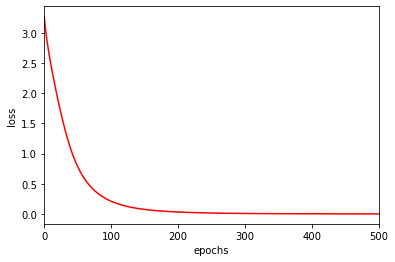

In [23]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')     # 配置计算类型 cpu/gpu
# device = torch.device('cpu')
    
# 定义数据维度
N, D_in, H, D_out = 100, 784,100,10   # N是batch, D_in是输入维度，H为隐藏层维度，D_OUT为输出维度

# 创建数据集
x = torch.randn(N, D_in)    # 因为网络模型原本是CPU的，所以输入数据也只能是CPU

# 由于模型计算的时候转移到了GPU上运行，所以模型的预测结果y_hat在GPU上
# 所以做loss计算的时候，y也必须与预测值y_hat在同一个GPU上
y = torch.randn(N, D_out).to(device)   

# 创建网络模型
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# 定义损失函数
loss_fn = torch.nn.MSELoss(reduction='sum')

lr = 1e-4
epochs = 10001
loss_list = []

t1 = time.time()

# 学习过程，梯度下降迭代
for t in range(epochs):
    # 网络模型forward，如果drive为GPU则把模型推到GPU上计算
    y_pred = model(x).to(device)
    
    # 计算损失
    loss = loss_fn(y_pred, y)
    
    RMSE = np.sqrt(loss.item()/N)
    loss_list.append(RMSE)
    if t < 10:
        print(t, RMSE)        # 打印RMSE
    elif t % 1000 == 0:
        print(t, RMSE)        # 打印RMSE
    
    # 更新梯度之前先清零
    model.zero_grad()
    
    # backward
    loss.backward()
    
    # 梯度更新
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad

            
t2 = time.time()
print(t2 - t1)

# 打印训练过程
plt.plot(range(len(loss_list)), loss_list, color='r')
plt.xlim(0, 500)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()   
    

### PyTorch:optim 使用pytorch的优化器

0 3.2151007073797473
1 3.118288593905768
2 3.0299800013521128
3 2.9484302546943306
4 2.8716803184829782
5 2.7991285875445904
6 2.730543073916913
7 2.6647162870791705
8 2.6009935094744328
9 2.5393511855116406
1000 2.3879625722909825e-06
2000 8.702772489600789e-07
3000 5.914665650166856e-07
4000 4.5478357085138424e-07
5000 3.7296423878149027e-07
6000 3.2738920111640735e-07
7000 2.7906968670376214e-07
8000 2.6930168561928594e-07
9000 2.417632055109106e-07
10000 2.3494825692895355e-07
11.104975700378418


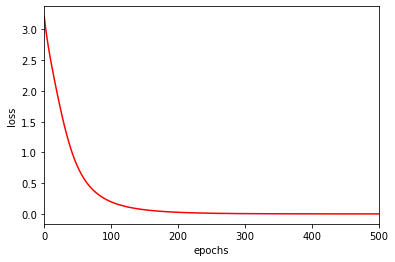

In [24]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')     # 配置计算类型 cpu/gpu
# device = torch.device('cpu')
    
# 定义数据维度
N, D_in, H, D_out = 100, 784,100,10   # N是batch, D_in是输入维度，H为隐藏层维度，D_OUT为输出维度

# 创建数据集
x = torch.randn(N, D_in)    # 因为网络模型原本是CPU的，所以输入数据也只能是CPU

# 由于模型计算的时候转移到了GPU上运行，所以模型的预测结果y_hat在GPU上
# 所以做loss计算的时候，y也必须与预测值y_hat在同一个GPU上
y = torch.randn(N, D_out).to(device)   

# 创建网络模型
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# 定义损失函数
loss_fn = torch.nn.MSELoss(reduction='sum')

# 定义优化器
lr = 1e-4
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

epochs = 10001
loss_list = []

t1 = time.time()

# 学习过程，梯度下降迭代
for t in range(epochs):
    # 网络模型forward，如果drive为GPU则把模型推到GPU上计算
    y_pred = model(x).to(device)
    
    # 计算损失
    loss = loss_fn(y_pred, y)
    
    RMSE = np.sqrt(loss.item()/N)
    loss_list.append(RMSE)
    if t < 10:
        print(t, RMSE)        # 打印RMSE
    elif t % 1000 == 0:
        print(t, RMSE)        # 打印RMSE
    
    # 更新梯度之前先清零
    optimizer.zero_grad()
    
    # backward
    loss.backward()
    
    # 用优化器更新梯度
    optimizer.step()

            
t2 = time.time()
print(t2 - t1)

# 打印训练过程
plt.plot(range(len(loss_list)), loss_list, color='r')
plt.xlim(0, 500)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()   

- 整理一下干净的代码

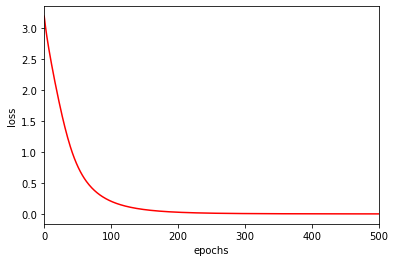

In [25]:
import torch
import numpy as np
import matplotlib.pyplot as  plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

N, D_in, H, D_out = 100, 784,100,10
lr = 1e-4
epochs = 10001
loss_list = []

x = torch.randn(N, D_in)
y = torch.randn(N, D_out).to(device)  

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.MSELoss(reduction='sum')

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for t in range(epochs):
    y_pred = model(x).to(device)

    loss = loss_fn(y_pred, y)
    loss_list.append(np.sqrt(loss.item()/N))
    
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()


plt.plot(range(len(loss_list)), loss_list, color='r')
plt.xlim(0, 500)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()   


### PyTorch:继承nn.Module创建自己的网络

[3.4274825739956643, 3.2963424180130305, 3.179529134569791, 3.073085629403211, 2.975506933282086, 2.8845358558842418, 2.800352864510379, 2.7214764483902973, 2.6460286666574397, 2.5732559927582717]
[3.4274825739956643, 0.18051978871666402, 0.026107103616380335, 0.005968053640228167, 0.0014930846590737834, 0.0003822903077483372, 9.885403381796228e-05, 2.6256277324909775e-05, 8.927922262158667e-06, 4.812906026155417e-06]


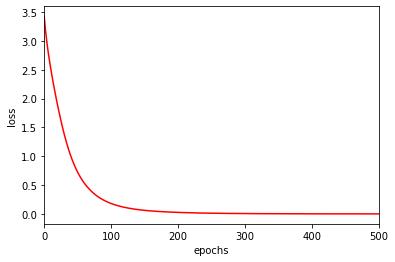

tensor([[ 0.0082,  0.0188,  0.0250,  ...,  0.0054, -0.0331, -0.0271],
        [ 0.0298,  0.0308, -0.0272,  ..., -0.0166, -0.0143, -0.0202],
        [ 0.0243, -0.0114, -0.0008,  ...,  0.0135,  0.0183,  0.0071],
        ...,
        [ 0.0105,  0.0162, -0.0191,  ..., -0.0218,  0.0152,  0.0140],
        [ 0.0192, -0.0079,  0.0087,  ..., -0.0176, -0.0353,  0.0261],
        [ 0.0340,  0.0174,  0.0254,  ..., -0.0089, -0.0214,  0.0244]])


In [32]:
#!/usr/bin/env python
# -*- coding: UTF-8 -*-
"""
==================================================
@Project -> File   ：study-ml -> fcnn.py
@IDE    ：PyCharm
@Author ：jhong.tao
@Date   ：2021/6/28 21:35
@Desc   ：
==================================================
"""
import torch
import numpy as np
import matplotlib.pyplot as plt

# 自定义模型
class MyNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(MyNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

loss_list = []

N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in)
y = torch.randn(N, D_out).to(device)

model = MyNet(D_in, H, D_out)

loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

epochs = 1000
for t in range(epochs):
    y_pred = model(x).to(device)

    loss = loss_fn(y_pred, y)
    loss_list.append(np.sqrt(loss.item() / N))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(loss_list[:10])
print(loss_list[::100])

plt.plot(range(len(loss_list)), loss_list, color='r')
plt.xlim(0, 500)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

print(model.state_dict().get('linear1.weight')[0:10])

torch.save(model, 'model')

## PyTorch 实现手写数字识别

- 数据集
Data：http://yann.lecun.com/exdb/mnist/


训练集:
数据集大小: torch.Size([60000, 28, 28])
数据集标签: torch.Size([60000])
图片的维度: torch.Size([28, 28])


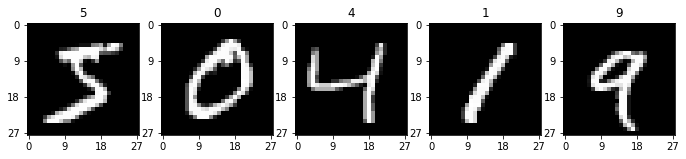


测试集:
数据集大小: torch.Size([10000, 28, 28])
数据集标签: torch.Size([10000])
图片的维度: torch.Size([28, 28])


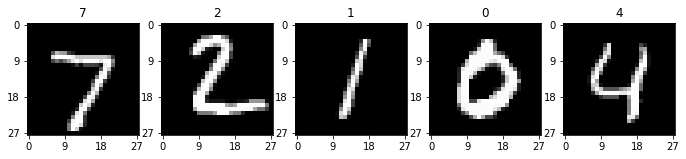

In [21]:
import torchvision
from torchvision.datasets import mnist
from torchvision import transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


def data_show(train_set, img_rows=1, img_cols=5):
    print('数据集大小:', train_set.data.size())
    print('数据集标签:', train_set.targets.size())
    img_size = train_set.data[0].size()
    print('图片的维度:', img_size)
    
    plt.figure()
    for i in range(img_cols*img_rows):
        plt.subplot(img_rows, img_cols, i+1)      # subplot(行，列，图片序号) 重点：图片序号是从1开始的,行优先
        plt.imshow(train_set.data[i].numpy(), cmap='gray')
        plt.title('%i' % train_set.targets[i])
        plt.xticks(range(0, img_size[0], 9))
        plt.yticks(range(0, img_size[0], 9))
        plt.subplots_adjust(left=0.5, right=2)
    plt.show()


if __name__ == '__main__':
    train_set = mnist.MNIST(root='../ch00_dataset', train=True, transform=transform, download=False)
    test_set = mnist.MNIST('../ch00_dataset', train=False, transform=transform, download=False)

    print('训练集:')
    data_show(train_set)

    print('\n测试集:')
    data_show(test_set)

In [ ]:
import torchvision
from torchvision.datasets import mnist
from torchvision import transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


def data_show(train_set, img_rows=1, img_cols=5):
    print('数据集大小:', train_set.data.size())
    print('数据集标签:', train_set.targets.size())
    img_size = train_set.data[0].size()
    print('图片的维度:', img_size)
    
    plt.figure()
    for i in range(img_cols*img_rows):
        plt.subplot(img_rows, img_cols, i+1)      # subplot(行，列，图片序号) 重点：图片序号是从1开始的,行优先
        plt.imshow(train_set.data[i].numpy(), cmap='gray')
        plt.title('%i' % train_set.targets[i])
        plt.xticks(range(0, img_size[0], 9))
        plt.yticks(range(0, img_size[0], 9))
        plt.subplots_adjust(left=0.5, right=2)
    plt.show()


if __name__ == '__main__':
    train_set = mnist.MNIST(root='../ch00_dataset', train=True, transform=transform, download=False)
    test_set = mnist.MNIST('../ch00_dataset', train=False, transform=transform, download=False)
    
    train_data = DataLoader(train_set, batch_size=64, shuffle=True)
    test_set = DataLoader(test_set, batch_size=64, shuffle=True)

